# MEDICAL PREDICTION Using LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [5]:
dataset= pd.read_csv(r'C:\Users\HP\Desktop\MachineLearning\Linear_reg_project\dataset_medical_insurance.csv',header=0)

In [6]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
dataset['age'].corr(dataset['charges'],method="pearson")

0.29900819333064765

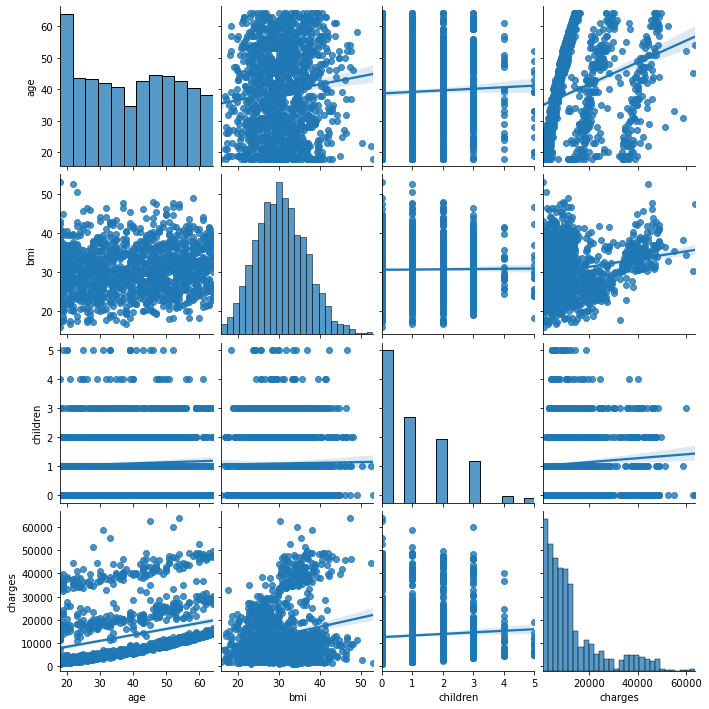

In [10]:
sns.pairplot(dataset,kind='reg')
plt.show()

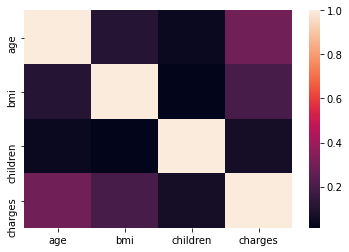

In [11]:
sns.heatmap(dataset.corr())
plt.show()

In [12]:
Y = dataset['charges']
X = dataset.drop('charges', axis = 1)

In [13]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,train_size=.7,test_size=.3,random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [16]:
lm.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = lm.predict(x_test)

In [18]:
error=y_test-y_pred
table=pd.DataFrame({'Actual':y_test,'predicted':y_pred,'Error':error})
table.head()

,Actual,predicted,Error
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


In [19]:
print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)

Intercept:  -11039.238418561546
Coefficients:  [  251.68186515   322.38910684   344.9642553   -282.79634661
 24059.39047692  -304.09009765  -939.34209691  -868.18855866]


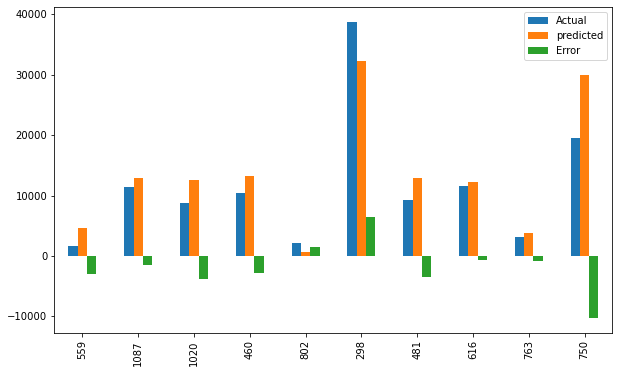

In [20]:
table_small = table.head(10)
table_small.plot(kind = 'bar', figsize = (10,6))
plt.show()

In [21]:
#Accuracy - RMSE

from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 6063.12265685045
